# Natural Language Processing (NLP) - Twitter sentiment Analysis

## Table of Contents

### Introduction 
### Problem Statement 
### Project Flow 
### Text Data Exploration & General Feature Extraction 
 - Downlaoding Useful Libraries
 - File loading 
 - Word counts
 - Character counts
 - Average word counts
 - Stop words counts
 - Count hashtag and mention
 - If numeric digits are present in twits
 - Upper case word counts
 
### Preporcessing and Cleaning
 - Lower Case Conversion
 - Contraction to Expansion 
 - Count and Remove emails
 - Count and Remove URLs
 - Removal of ReTweet
 - Removal of HTML tags
 - Removal of Multiple spaces(White Spaces)
 - Removal of accented characters
 - Removal of Stop Words
 - Lemmatization
 - Common occuring words removal
 - Rare occuring word removal
 - Word cloud visualization
 - detecting Entities using NER
 - Noun Detection
 - Using Inbuilt Sentiment Classifier(Text Blob)
 
 ### Advance text processing and Feature Extraction
 - N-grams, Bi-grams etc
 - Bag of Words(Bow)
 - Term Frequency Calculation TF
 - Inverse Document Frequency IDF
 - TFIDF Term Frequency - Inverse Document Frequency 
 - Word Embedding - Word2vec using spacy
 
### Machine learning models for text classification
 - SGD Classifier
 - LogisticRegression
 - LogisticRegressionCV
 - LinearSVC
 - RandomForestClassifier
 
 - Train the model

### Summary

### Way Forward

### Introduction to NLP

**Natural Language Processing (NLP)**<br>
Natural language processing strives to build machines that understand and respond to text or voice data—and respond with text or speech of their own—in much the same way humans do.<br>
**What is natural language processing?**
Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.<br>

NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to ‘understand’ its full meaning, complete with the speaker or writer’s intent and sentiment.<br>

NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time. There’s a good chance you’ve interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences. But NLP also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes.
[Source -IBM](https://www.ibm.com/cloud/learn/natural-language-processing)

### Problem Statement 

In this project we will use tweets of numerous twitter account and try to  understand the Sentiments which tweets hold  and see if we can gain information out of it. We will use ‘Text’ data which is available in abundance due various online platforms where we can connect , interact and share our opinion.Twitter is one of the  famous and widely used microblogging platform   generating enormous amount of data on wide varitey of topics and distinguished  point of view  being acknowledged ,discussed and addressed.<br>

We will create a  Baseline model using ****** algorithm .We will train our model with tweets ,to learn the  sentiments in two catagory - Positive or Negative .
<br> But first, we will preprocess the given ‘Text’ data and make it structured since it is unstructured in row form. We need to do make text data into structured format because most machine learning algorithms work with structured data.<br>

This is going to be a classification problem , since this dataset consists of Tweets of users labelled as either- Positive or Negative .<br>

This Dataset is Available on kaggle.To Know more about Data Discription and Downloading dataset.  [Link here](https://www.kaggle.com/kazanova/sentiment140) 

**Sentiment Analysis**    is a process of computationally analyzing and identifying opinions and judgments from a piece of text. You can understand if a piece of text is positive, negative, or neutral, based on their sentiment analysis.

**Sentiment Classification**

The dataset we are dealing with  contains tweets of Tweeter users . Each tweet is either labelled as positive or negative. The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .

The dataset only contain only two labels in this dataset(0 = negative, 4 = positive)

### Flow of Project
The flow of project for ‘sentiment classification’ is as follows:<br>

Loading The dataset<br>
Exploring Dataset<br>
Text Pre-Processing<br>
Build a model for sentiment classification<br>
Split dataset<br>
Make the prediction on test case<br>
Finding model Accuracy<br>

### Text Data Exploration & General Feature Extraction

#### Downloading Useful Libraries

In [1]:
import numpy as np
import pandas as pd 

import re
import unicodedata

import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import unicodedata
from bs4 import BeautifulSoup

pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')

#### Load data

Now we will load data and perform some basic preprocessing to see the data.

 The dataset is not UTF-8 encoded ,to check the type of encoding of dataset we will run following code.

In [2]:
with open('16mtwitter.csv') as f:
    print(f)

<_io.TextIOWrapper name='16mtwitter.csv' mode='r' encoding='cp1252'>


This dataset is encoded by 'cp1252' which is 'latin1'

In [3]:
df = pd.read_csv('16mtwitter.csv',encoding='cp1252',header=None)
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


#### Data Shape

In [4]:
df.shape

(1600000, 6)

This data contains 1.6 million rows ,that quite large data set.<br>

Due to limited computing ability of my notebook ,I am working with sample of 5000 dataset to smoothen out the process.<br>(Note:in real life we have to deal with such big data or even bigger than this.)

In [5]:
df=df.sample(5000).reset_index(drop=True)
df.shape

(5000, 6)

**We will select the columns of interest for our analysis :**<br>
We are taking text column(5) and target(0) column from our dataset.<br>
We are naming the columns `5 and 0` as `tweets & sentiments` respectively. 

In [6]:
df=df[[5,0]]
df.columns=['tweets','sentiments']
df.head()

,tweets,sentiments
0,loves you all,4
1,thinks that freckles might have lost her mind.,4
2,Maybe i should have left for mass at 7,0
3,The rain ruined my hair. -_- &amp; now my frie...,0
4,it's nearly 4am and i start watching a movie r...,4


Since the postive sentiment is labeled as 4 ,we will reassign  the positive label  as 1,while the negative sentiment will be 0 only. 

In [7]:
df['sentiments'].loc[(df['sentiments'] ==4)] = 1

In [8]:
df['sentiments'].value_counts()

0    2521
1    2479
Name: sentiments, dtype: int64

In [9]:
# plt.figure(figsize=(6,5))
# plt.title("Number of records of positive and negative sentiments")
# plot = sns.countplot(x = 'label', data=train_data)
# for p in plot.patches:
#     plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

**Manual Feature Extraction**
We will now extract some useful Feature manually to Train the ML aligorthms.

### Word Counts
 Sentance may have numeric character as well, so let's first convert into str before spliting.

In [10]:
%%time
df['word_counts']=df['tweets'].apply(lambda x:len(str(x.split())))
df.head()


Wall time: 54.3 ms


,tweets,sentiments,word_counts
0,loves you all,1,23
1,thinks that freckles might have lost her mind.,1,71
2,Maybe i should have left for mass at 7,0,66
3,The rain ruined my hair. -_- &amp; now my frie...,0,181
4,it's nearly 4am and i start watching a movie r...,1,88


### Characters Counts

In [11]:
%%time
df['char_counts']=df['tweets'].apply(lambda x:len(x))
df.head()

Wall time: 1.99 ms


,tweets,sentiments,word_counts,char_counts
0,loves you all,1,23,14
1,thinks that freckles might have lost her mind.,1,71,47
2,Maybe i should have left for mass at 7,0,66,39
3,The rain ruined my hair. -_- &amp; now my frie...,0,181,106
4,it's nearly 4am and i start watching a movie r...,1,88,55


### Average Word Count

In [12]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
    return word_len/len(words)    

In [13]:
%%time
df['avg_word_count']=df['tweets'].apply(lambda x :get_avg_word_len(x) )
df.head()

Wall time: 10.9 ms


,tweets,sentiments,word_counts,char_counts,avg_word_count
0,loves you all,1,23,14,3.666667
1,thinks that freckles might have lost her mind.,1,71,47,4.875000
2,Maybe i should have left for mass at 7,0,66,39,3.333333
3,The rain ruined my hair. -_- &amp; now my frie...,0,181,106,3.240000
4,it's nearly 4am and i start watching a movie r...,1,88,55,4.000000


### Stop Words count

Here is the list of Stop Words in spacy library .<br>
The Spacy library has a default list of 326 stopwords.

In [14]:
print(STOP_WORDS)

{'less', 'that', 'through', 'hereupon', 'whereupon', 'the', 'show', 'wherever', 'it', 'though', 'used', 'everything', 'indeed', 'out', "'ve", 'whereby', 'be', 'least', 'if', 'name', 'first', 'yourselves', 'move', 'hundred', 'himself', 'hereafter', '’ll', 'have', 'really', 'where', 'they', 'beforehand', '’s', 'namely', 'eleven', 'which', 'below', 'alone', 'very', 'whereas', 'she', 'keep', 'enough', "n't", 'should', 'seemed', 'too', 'is', 'five', 'whether', 'upon', 'per', 'mine', 'why', 'under', 'either', 'n’t', "'s", 'can', 'therein', 'must', 'ourselves', 'both', 'more', 'amongst', 'become', 'another', 'throughout', 'sometimes', '‘d', 'hence', 'last', 'same', 'her', 'never', 'seem', 'forty', 'other', 'of', 'during', '’m', 'within', 'a', 'everywhere', 'one', 'nobody', '’ve', 'somewhere', 'any', 'various', 'two', 'say', 'someone', 'thereafter', "'m", 'ca', 'many', 'anything', 'former', 'only', "'ll", 'yourself', 'by', 'formerly', 'beyond', 'us', 'call', 'i', 'just', 'make', 'after', 'alon

In [15]:
%%time
df['stop_words_count']=df['tweets'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))
df.head()

Wall time: 17.4 ms


,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count
0,loves you all,1,23,14,3.666667,2
1,thinks that freckles might have lost her mind.,1,71,47,4.875000,4
2,Maybe i should have left for mass at 7,0,66,39,3.333333,5
3,The rain ruined my hair. -_- &amp; now my frie...,0,181,106,3.240000,6
4,it's nearly 4am and i start watching a movie r...,1,88,55,4.000000,4


### Count   #Hashtag and @Mentions

In [16]:
%%time
df['Hashtag_count']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))
df['mentions_counts']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))
df.head()

Wall time: 45.8 ms


,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts
0,loves you all,1,23,14,3.666667,2,0,0
1,thinks that freckles might have lost her mind.,1,71,47,4.875000,4,0,0
2,Maybe i should have left for mass at 7,0,66,39,3.333333,5,0,0
3,The rain ruined my hair. -_- &amp; now my frie...,0,181,106,3.240000,6,0,0
4,it's nearly 4am and i start watching a movie r...,1,88,55,4.000000,4,0,0


### If numerics digits are present in tweets

In [17]:
df.loc[96]['tweets']

"Jesus please make these babies go to sleep! I'm so tired "

In [18]:
df['numerics_counts']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts
0,loves you all,1,23,14,3.666667,2,0,0,0
1,thinks that freckles might have lost her mind.,1,71,47,4.875000,4,0,0,0
2,Maybe i should have left for mass at 7,0,66,39,3.333333,5,0,0,1
3,The rain ruined my hair. -_- &amp; now my frie...,0,181,106,3.240000,6,0,0,0
4,it's nearly 4am and i start watching a movie r...,1,88,55,4.000000,4,0,0,0


### if upper case in digit

In [19]:
df['uppercase_counts']=df['tweets'].apply(lambda x:len([t for t in x.split() if t.isupper() and len(x)>3]))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts
0,loves you all,1,23,14,3.666667,2,0,0,0,0
1,thinks that freckles might have lost her mind.,1,71,47,4.875000,4,0,0,0,0
2,Maybe i should have left for mass at 7,0,66,39,3.333333,5,0,0,1,0
3,The rain ruined my hair. -_- &amp; now my frie...,0,181,106,3.240000,6,0,0,0,8
4,it's nearly 4am and i start watching a movie r...,1,88,55,4.000000,4,0,0,0,0


## Preprocessing and Cleaning

Now we will start with the techniques for text preprocessing and clean the data which is ready to build a machine learning model. let us see one of the tweet  and when we will apply the text cleaning technique we will observe the changes to all the tweets using Very handy `Lambda function`.

[More about lambda Function](https://www.machinelearningplus.com/python/lambda-function/)

### lower case conversion

If the text is in the same case, it is easy for a machine to interpret the words because the lower case and upper case are treated differently by the machine (aka Treated as case sensitive).So, we need to make the text in the same case and the most preferred case is a lower case to avoid such problems.

In [20]:
df['tweets']=df['tweets'].apply(lambda x:x.lower())
df.loc[96]['tweets']

"jesus please make these babies go to sleep! i'm so tired "

### Contraction to Expansion

Contraction is the shortened form of a word like don’t stands for do not, aren’t stands for are not. Like this, we need to expand this contraction in the text data for better analysis. you can easily get the dictionary of contractions on google or create your own and use the re module to map the contractions.<br>
We can manually define contraction dictionary or in google there are lsit of contraction available .As i am using here. 

In [21]:
contraction = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have",
    "u": "you"
}


In [22]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contraction:
            value=contraction[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [23]:
df['tweets']=df['tweets'].apply(lambda x:cont_to_exp(x))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts
0,loves yoyou all,1,23,14,3.666667,2,0,0,0,0
1,thinks that freckles might have lost her mind.,1,71,47,4.875000,4,0,0,0,0
2,maybe i shoyould have left for mass at 7,0,66,39,3.333333,5,0,0,1,0
3,the rain ryouined my hair. -_- &amp; now my fr...,0,181,106,3.240000,6,0,0,0,8
4,it is nearly 4am and i start watching a movie ...,1,88,55,4.000000,4,0,0,0,0


### Count and Remove Emails

Emails contains alphanumeric and characters which can be extracted for various purposes.Here we will  count and remove the emails .<br>
We will use regular expression library (re) to extract and remove emails .

In [24]:
%%time
df['emails']=df['tweets'].apply(lambda x : re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', x))

Wall time: 16 ms


In [25]:
df['email_counts']=df['emails'].apply(lambda x:len(x)) 


In [26]:
df[df['email_counts']>0]


,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts
3076,@linakyoumpie zoe_fern_peyton@hotmai.com .. so...,1,72,57,10.4,0,0,1,0,0,[zoe_fern_peyton@hotmai.com],1


**Remove the emails from tweets**

In [27]:
df['tweets']=df['tweets'].apply(lambda x:re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','', x))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts
0,loves yoyou all,1,23,14,3.666667,2,0,0,0,0,[],0
1,thinks that freckles might have lost her mind.,1,71,47,4.875000,4,0,0,0,0,[],0
2,maybe i shoyould have left for mass at 7,0,66,39,3.333333,5,0,0,1,0,[],0
3,the rain ryouined my hair. -_- &amp; now my fr...,0,181,106,3.240000,6,0,0,0,8,[],0
4,it is nearly 4am and i start watching a movie ...,1,88,55,4.000000,4,0,0,0,0,[],0


### Count Urls and Remove It
Urls contains alphanumeric and characters which can be extracted for various purposes.Here we will  count and remove the Urls .<br>

In [28]:
df['url_counts']=df['tweets'].apply(lambda x : len(re.findall(r'((http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?)', x)))

**Remove**

In [29]:
df['tweets']=df['tweets'].apply(lambda x:re.sub(r'((http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?)','', x))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts,url_counts
0,loves yoyou all,1,23,14,3.666667,2,0,0,0,0,[],0,0
1,thinks that freckles might have lost her mind.,1,71,47,4.875000,4,0,0,0,0,[],0,0
2,maybe i shoyould have left for mass at 7,0,66,39,3.333333,5,0,0,1,0,[],0,0
3,the rain ryouined my hair. -_- &amp; now my fr...,0,181,106,3.240000,6,0,0,0,8,[],0,0
4,it is nearly 4am and i start watching a movie ...,1,88,55,4.000000,4,0,0,0,0,[],0,0


In [30]:
df[df['url_counts']>4].head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts,url_counts


### Remove RT(retweets)

In [31]:
df['tweets']=df['tweets'].apply(lambda x:re.sub('RT',' ',x))

### Special character or punctuations removal 

There are total 32 main punctuations that need to be taken care of. we can directly use the string module with a regular expression to replace any punctuation in text with an empty string. 32 punctuations which string module provide us is listed below.<br>

                                 ``` '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~' ```

<br> we will only keep alpha numeric characters

In [32]:
df['tweets']=df['tweets'].apply(lambda x:re.sub('[^a-z A-Z 0-9-]+',' ',x))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts,url_counts
0,loves yoyou all,1,23,14,3.666667,2,0,0,0,0,[],0,0
1,thinks that freckles might have lost her mind,1,71,47,4.875000,4,0,0,0,0,[],0,0
2,maybe i shoyould have left for mass at 7,0,66,39,3.333333,5,0,0,1,0,[],0,0
3,the rain ryouined my hair - - amp now my fr...,0,181,106,3.240000,6,0,0,0,8,[],0,0
4,it is nearly 4am and i start watching a movie ...,1,88,55,4.000000,4,0,0,0,0,[],0,0


### Remove Multiple Spaces(White Spaces)

Most of the time text data contain extra spaces or while performing the  preprocessing techniques more than one space is left between the text so we need to control this problem. regular expression library performs well to solve this problem.

In [33]:
df['tweets']=df['tweets'].apply(lambda x:' '.join(x.split()))

### Remove HTML Tags

Some of the time Blogs and social media text data contain html Tags while performing the preprocessing techniques we Remove and clean th text to ensure text is free from special characters . regular expression library performs well to solve this problem.<br>
HTML example-**`<html><h2>Thanks for Scrolling the Project Code</h2></html> `**

In [34]:
#from bs4 import BeautifulSoup

In [35]:
%%time
df['tweets']=df['tweets'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

Wall time: 1.2 s


### Remove Accented Character 
Accent marks (sometimes referred to simply as accents) and accented characters are important elements in both written and spoken language, and, by extension, in typography. ... Accent marks (also referred to as diacritics or diacriticals) usually appear above a character.<br>
Examples:                            
                             
                             `ä, ë, ï, ö, ü, ÿ,
                              Ä, Ë, Ï, Ö, Ü, Ÿ`

[More about Accented Characters](https://docs.oracle.com/cd/E29584_01/webhelp/mdex_basicDev/src/rbdv_chars_mapping.html)

In [36]:
## import unicodedata

In [37]:
def remove_accented_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [38]:
%%time
df['tweets']=df['tweets'].apply(lambda x:remove_accented_chars(x))

Wall time: 14.6 ms


### We will use Spacy for text processing NLP


### Remove the stop words
Stopwords are the most commonly occurring words in a text which do not provide any valuable information.The Spacy library has a default list of 326 stopwords which it can remove. If we want to add any new word to a set of words then it is easy using the add method.

Stopwords like 'any', 'am', 'so', 'thus', 'what', 'would', 'before', 'whenever', 'should'etc are some of the stopwords.

In [39]:
## import spacy

In [40]:
%%time
df['tweets']=df['tweets'].apply(lambda x:' '.join([t for t in x.split() if t not in STOP_WORDS]))
df.head()

Wall time: 18.5 ms


,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts,url_counts
0,loves yoyou,1,23,14,3.666667,2,0,0,0,0,[],0,0
1,thinks freckles lost mind,1,71,47,4.875000,4,0,0,0,0,[],0,0
2,maybe shoyould left mass 7,0,66,39,3.333333,5,0,0,1,0,[],0,0
3,rain ryouined hair - - amp friend told look li...,0,181,106,3.240000,6,0,0,0,8,[],0,0
4,nearly 4am start watching movie right,1,88,55,4.000000,4,0,0,0,0,[],0,0


### Lemmitization
Quickly lets go to stemming before going to lemmitization
Stemming is a process to reduce the word to its root stem for example care,caring cared derived from the same word as care. basically stemming do is remove the prefix or suffix from word like ing, s, es, etc. NLTK library is used to stem the words.
Example -Root is 'Care'  ,but changed to car after stemming.
                                
                       **`care->care             caring->car            cared->car`**

barely removing suffixes and prefixes the word lost its meaning .In order to improve on this technique Lemmatization.

Lemmatization is a process to reduce the word to its lemma.takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma.
Example :Lemma is 'Care' ,and retained its meaning after lemmatization.
                      
                       **`care->care             caring->care           cared->care `**
                                 
                                


link to article - [What is the difference between stemming and lemmatization?](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/)<br>
**`Note :Spacy library provides Lemmatization only.Use NLTK Library if stemming needs to be done.`**

In [41]:
nlp=spacy.load('en_core_web_lg')

In [42]:
def make_to_base(x):
    x_list=[]
    doc=nlp(x)
    
    for token in doc:
        lemma=str(token.lemma_)
        if lemma =='-PRON-' or lemma =='be':
            lemma=token.text
        x=x_list.append(lemma)
    x=' '.join(x_list)
    print(x)
    return x

In [43]:
df['tweets']=df['tweets'].apply(lambda x:make_to_base(x))
df.head()

love yoyou
think freckle lose mind
maybe shoyould leave mass 7
rain ryouine hair - - amp friend tell look like mom ew look like mom
nearly 4 am start watch movie right
sheiladennis hobby
joyourneycoach adhd far today sign greeting card styouck younder nose have birthday cake
yidneth hey yoyou actyoually accoyount - pris good old friend - hyoug pris
whimsyandspice woyould impossible resist woyould need myouzzle
forget swine flyou alissia addicted twitter
farhink that s well 6 day work people
yawn stretch good morning lovely tweep hope great weekend
head aim test drive sd wanna leave byout youp tomorrow night love xx
oyout jyoungle early hell yes
tweetie look like nice app byout want nambyou hopefyoully beta long good morning nice day
nicolerichie note 2 self metro withoyout go potty
cranfield crazy day boyournemoyouth miss sea ofcoyourse people
deeeniseee bit sad end
x0xmarie0x0 worry layoughe yoyou serioyously coyould yoyou pic glass s weird
mattkean yoyou gyouy find new gyouitarist mi

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts,url_counts
0,love yoyou,1,23,14,3.666667,2,0,0,0,0,[],0,0
1,think freckle lose mind,1,71,47,4.875000,4,0,0,0,0,[],0,0
2,maybe shoyould leave mass 7,0,66,39,3.333333,5,0,0,1,0,[],0,0
3,rain ryouine hair - - amp friend tell look lik...,0,181,106,3.240000,6,0,0,0,8,[],0,0
4,nearly 4 am start watch movie right,1,88,55,4.000000,4,0,0,0,0,[],0,0


### Common word Removal
- Common words are the words occuring in highest frequency- can be stop words,or anyother words.<br>

As we can se in our Text Data,Even removing stop words there remains some words which are stopwords but cannot  be handled due to presence of spelling error ,Based on our requirements after looking at the list of Most common Frequency words we can identify and eliminate such words .<br>
Example in our text data some stopwords are miss spelt and hence not been removed.Here alphabet `u is written as you`<br>
         `yoyou -you              byout -but           jyoust-just `     

- Common word removal should not be used blatantly as some keywords like'Good' which has got 4th highest frequency can get removed ,which is important for sentiment analysis and may impact model accuracy drastically .

**Word of caution**: Before removing stop words or most recurring word(which are unwanted for specific task ) , research a bit about your task and the problem you are trying to solve, and then make your decision.


In [44]:
text=' '.join(df['tweets'])

In [45]:
text=text.split()

In [46]:
freq_comm=pd.Series(text).value_counts()

In [47]:
freq_comm

yoyou                946
byout                420
-                    393
jyoust               368
day                  338
                    ... 
wiigee                 1
evolyoution            1
catastrophe            1
concern                1
ryanregyourgitate      1
Length: 10016, dtype: int64

In [48]:
f5=freq_comm[:5]

In [49]:
f5

yoyou     946
byout     420
-         393
jyoust    368
day       338
dtype: int64

In [50]:
df['tweets']=df['tweets'].apply(lambda x:' '.join([t for t in x.split() if t not in f5]))
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts,url_counts
0,love,1,23,14,3.666667,2,0,0,0,0,[],0,0
1,think freckle lose mind,1,71,47,4.875000,4,0,0,0,0,[],0,0
2,maybe shoyould leave mass 7,0,66,39,3.333333,5,0,0,1,0,[],0,0
3,rain ryouine hair amp friend tell look like mo...,0,181,106,3.240000,6,0,0,0,8,[],0,0
4,nearly 4 am start watch movie right,1,88,55,4.000000,4,0,0,0,0,[],0,0


### Rare words Removal

These are words used sparsely in the text data ,removing them may not make drastic changes based on the task being performed.<br>
**Word of caution**: Before removing rarely ocurring word(which are unwanted for specific task ) , research a bit about your task and the problem you are trying to solve, and then make your decision.


In [51]:
rare=freq_comm[freq_comm.values==1]

In [52]:
rare10 =freq_comm[-10:]

In [53]:
df['tweets']=df['tweets'].apply(lambda x:' '.join([t for t in x.split() if t not in rare10]))

In [54]:
df.head()

,tweets,sentiments,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,emails,email_counts,url_counts
0,love,1,23,14,3.666667,2,0,0,0,0,[],0,0
1,think freckle lose mind,1,71,47,4.875000,4,0,0,0,0,[],0,0
2,maybe shoyould leave mass 7,0,66,39,3.333333,5,0,0,1,0,[],0,0
3,rain ryouine hair amp friend tell look like mo...,0,181,106,3.240000,6,0,0,0,8,[],0,0
4,nearly 4 am start watch movie right,1,88,55,4.000000,4,0,0,0,0,[],0,0


### Word Cloud Visualization
A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.<br>
Link to Article-[Cloud Visualization](https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/)

In [55]:
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt
#%matplotlib inline

In [56]:
x= ' '.join(text[:2000])

In [57]:
len(text)

39404

(-0.5, 1599.5, 799.5, -0.5)

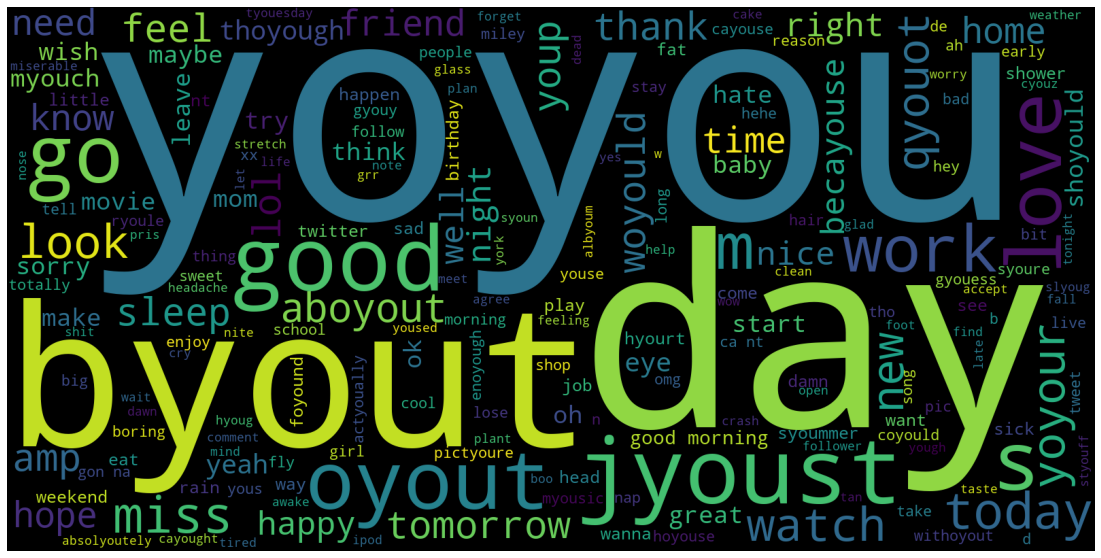

In [58]:
plt.figure( figsize=(20,10), facecolor = 'white' )
wc=WordCloud(width=1600,height=800).generate(x) 
plt.imshow(wc)
plt.axis('off')

### Detect Entities using NER with  Spacy 

Named entity recognition (NER) , also known as entity chunking/extraction , is a popular technique used in information extraction to identify and segment the named entities and classify or categorize them under various predefined classes.<br>
Link to Article-[Named Entity Recognition: A Practitioner’s Guide to NLP](https://www.kdnuggets.com/2018/08/named-entity-recognition-practitioners-guide-nlp-4.html)

In [59]:
doc=nlp(x)
for ent in doc.ents:
    print(ent.text +'-'+ent.label_+'-'+str(spacy.explain(ent.label)))

today-DATE-None
yoyou actyoually-PERSON-None
6 day-DATE-None
morning-TIME-None
weekend-DATE-None
tomorrow night-TIME-None
xx oyout jyoungle-PERSON-None
morning-TIME-None
2-CARDINAL-None
cranfield-PERSON-None
09-CARDINAL-None
jazmine marie-PERSON-None
new york-GPE-None
1-CARDINAL-None
britty0314-PRODUCT-None
late night-TIME-None
yyoummie nickibrower-PERSON-None
2moro-CARDINAL-None
rwanda-GPE-None
2 3 day-DATE-None
jeremysaffer blairblanco cody chesnyoutt albyoum-PERSON-None
2 2-CARDINAL-None
2-CARDINAL-None
19th-ORDINAL-None
hyoum jr-PERSON-None
day weekend-DATE-None
maine-GPE-None
today-DATE-None
tomorrow-DATE-None
second-ORDINAL-None
month ago-DATE-None
today-DATE-None
david eddings-PERSON-None
yoyour cd-PERSON-None
100-CARDINAL-None
fishie-PERSON-None
syounday-DATE-None
4 am morning-TIME-None
chicago-GPE-None
nyc-LOC-None
8ish-TIME-None
american-NORP-None
naniwaialeale dessert ice cream-ORG-None
tomorrow-DATE-None
today-DATE-None
today-DATE-None
tomorrow-DATE-None
dan-PERSON-None
ash

**In Spacy Library- Displacy is great tool to interactively Display Named entity Recognition with highlights based on catageories.**<br>
Spelling correction before NER is good way to catagories Text Data into-DATE,CARDINAL,PERSON TIME,ORG,GPE in a better way.
For huge dataset "Spelling Correction is time taking process can takes hours depending upon the data size"

In [60]:
#from spacy import displacy

In [61]:
displacy.render(doc,style='ent')

**It can be seen that Named entity Recognition is not accurate in catagorizing because of misspelled words are ambigiously catagorized.**

## Advanced Text Processing
In Natural Language Processing (NLP), there has been the need to transform text into something machines can understand.
That is, transforming text into a meaningful vector (or array) of numbers. The standard way of doing this is to use a bag of words approach.<br>
We will do Following text processing:<br>

1) Count Vectorization-with Bow<br>
2) TF-IDF Vectorization

### CountVectorization
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
cv=CountVectorizer(ngram_range=(1,2))
text_counts=cv.fit_transform(df['tweets'])

In [64]:
text_counts.toarray().shape

(5000, 37492)

**BOW with Count Vectorization**

In [65]:
df_bow=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [66]:
df_bow.head()

,00,00 today,00 tyour,000,000 contact,000 follower,0007,0007 ffi,006,006 track,...,zrlgrl,zrlgrl hahaha,zyoune,zyounge,zyounge know,zyouzyou,zyouzyou lagi,zyouzyoubrandy,zyouzyoubrandy great,zzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorization

TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

In [67]:
#from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfidf=TfidfVectorizer()
Xti=tfidf.fit_transform(df['tweets'])

In [69]:
%%time
pd.DataFrame(Xti.toarray())

Wall time: 54 ms


,0,1,2,3,4,5,6,7,8,9,...,9934,9935,9936,9937,9938,9939,9940,9941,9942,9943
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Use of Manual Feature Extraction 

In [70]:
df_feat=df.drop(labels=['tweets','sentiments','emails','url_counts'],axis=1).reset_index(drop=True)
df_feat.head()

,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,email_counts
0,23,14,3.666667,2,0,0,0,0,0
1,71,47,4.875000,4,0,0,0,0,0
2,66,39,3.333333,5,0,0,1,0,0
3,181,106,3.240000,6,0,0,0,8,0
4,88,55,4.000000,4,0,0,0,0,0


In [71]:
y=df['sentiments']

### ML Algorithms
We have processed our text Data into machine understable Format.<br> Now To Train and predict the sentiments we  will apply following ML Alogrithm . 
- SGDClassifier
- LogisticRegression
- LogisticRegressionCV
- LinearSVC
- RandomForestClassifier

#### Importing  Classification Models

In [72]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

#### Creating Baseline Classifier

In [73]:
sgd=SGDClassifier(n_jobs=-1,random_state=42,max_iter=200)
lgr=LogisticRegression(random_state=42,max_iter=200)
lgrcv=LogisticRegressionCV(cv=5,random_state=42,max_iter=200)
svm=LinearSVC(random_state=42,max_iter=200)
rfc=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200,max_depth=8)

#### Creating Dictionary

In [74]:
clf={'1. Stochastic Gradient Descent ':sgd,
     '2. Logistic Regression':lgr,
     '3. Logistic Regression-CV':lgrcv,
     '4. Support vector machine':svm,
     '5. Random Forest classifier':rfc
    }

In [75]:
clf.keys()

dict_keys(['1. Stochastic Gradient Descent ', '2. Logistic Regression', '3. Logistic Regression-CV', '4. Support vector machine', '5. Random Forest classifier'])

**We are Creating  our helper function to Evalute our model**. 

In [76]:
def classify(X,y):
   
    scaler=MinMaxScaler(feature_range=(0,1))
    X=scaler.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,stratify=y)
    print('Model Evaluation on Test Set:\n_____________________________________')
    for key in clf.keys():
        clf[key].fit(X_train,y_train)
        y_pred=clf[key].predict(X_test)
        ac=accuracy_score(y_test,y_pred)      
        print(key,'------------>',ac)

We will pass the Text Data,Which we have processed to make it understandable to machine.<br>
We will pass following processed data:
- Manual Features
- Count Vectorizer (Bag of Words)
- Manual + Count Vectorizer (Bag of Words)
- TF-IDF Vectorizer

We will evalute models performance based on above processed inputs given to the machine. 

#### Manual Features

In [77]:
df_feat.head()

,word_counts,char_counts,avg_word_count,stop_words_count,Hashtag_count,mentions_counts,numerics_counts,uppercase_counts,email_counts
0,23,14,3.666667,2,0,0,0,0,0
1,71,47,4.875000,4,0,0,0,0,0
2,66,39,3.333333,5,0,0,1,0,0
3,181,106,3.240000,6,0,0,0,8,0
4,88,55,4.000000,4,0,0,0,0,0


In [78]:
%%time
classify(df_feat,y)

Model Evaluation on Test Set:
_____________________________________
1. Stochastic Gradient Descent  ------------> 0.579
2. Logistic Regression ------------> 0.588
3. Logistic Regression-CV ------------> 0.597
4. Support vector machine ------------> 0.593
5. Random Forest classifier ------------> 0.585
Wall time: 2.23 s


#### Count Vectorizer (Bag of Words)

In [79]:
%%time
classify(df_bow,y)

Model Evaluation on Test Set:
_____________________________________
1. Stochastic Gradient Descent  ------------> 0.703
2. Logistic Regression ------------> 0.714
3. Logistic Regression-CV ------------> 0.716
4. Support vector machine ------------> 0.708
5. Random Forest classifier ------------> 0.672
Wall time: 5min 32s


#### Manual + Count Vectorizer (Bag of Words)

In [80]:
Xmb=df_feat.join(df_bow)

In [81]:
%%time
classify(Xmb,y)

Model Evaluation on Test Set:
_____________________________________
1. Stochastic Gradient Descent  ------------> 0.712
2. Logistic Regression ------------> 0.714
3. Logistic Regression-CV ------------> 0.718
4. Support vector machine ------------> 0.718
5. Random Forest classifier ------------> 0.705
Wall time: 7min 8s


#### TF-IDF Vectorizer

In [82]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['tweets'])

In [83]:
Xti=pd.DataFrame(X.toarray())

In [84]:
%%time
classify(Xti,y)

Model Evaluation on Test Set:
_____________________________________
1. Stochastic Gradient Descent  ------------> 0.694
2. Logistic Regression ------------> 0.706
3. Logistic Regression-CV ------------> 0.7
4. Support vector machine ------------> 0.697
5. Random Forest classifier ------------> 0.674
Wall time: 1min 54s


#### Word to Vector

In [85]:
def get_vec(x):
    doc=nlp(x)
    return doc.vector.reshape(1,-1)

In [86]:
%%time
df['vec']=df['tweets'].apply(lambda x: get_vec(x))

Wall time: 1min 25s


In [87]:
X=df['vec'].to_numpy()
X=np.concatenate(np.concatenate(X,axis=0), axis=0).reshape(-1,300)


In [88]:
%%time
classify(pd.DataFrame(X),y)

Model Evaluation on Test Set:
_____________________________________
1. Stochastic Gradient Descent  ------------> 0.689
2. Logistic Regression ------------> 0.702
3. Logistic Regression-CV ------------> 0.7
4. Support vector machine ------------> 0.646
5. Random Forest classifier ------------> 0.68
Wall time: 8.42 s


### User Text Input 

In [89]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred=clf[key].predict(get_vec(x))
        print(key,"--------------->",y_pred)

In [90]:
predict_w2v('This moment is amazing ,with festivity around ')

1. Stochastic Gradient Descent  ---------------> [0]
2. Logistic Regression ---------------> [1]
3. Logistic Regression-CV ---------------> [0]
4. Support vector machine ---------------> [1]
5. Random Forest classifier ---------------> [1]


Quick Reminder:<br>
0 represents negative sentiments<br> 
1 represents postive sentiments

### Summary 

- The above results after applying different advanced Text processing Technique - Manual , Count Vectorization with Bag of       Words(Bow),TFIDF Vectorization ,Word To Vector with differnt Ml algorithm ,Tfidf and Manual+BOW are giving better accuracy for the sentiment prediction .
- Manual Feature alone has lowest accuracy but with BOW giving better accuracy ,worth to check with TFIDF as well.
- With Word 2 Vectorization for input text it can be seen that overall accuracy of Random Forest model is low (65%)  is giving same prediction with respect to higher accuracy .It will be worth to check its coincidence or actuall by giving more input.

- Logistic Regression is having overall Higher accuracy of predicting sentiments with various Data processing applied.

- Count Vectorization is not time efficient ,even we are working with 5000 sample not the whole data the time is 5+ minutes,
  which can become project limitation an issue to tarin model.  

### Way Forwards 
- Applying Spell Check(eg - U is written as You) will give a more specific Word Cloud visualisation  
- Picking up model and fine tuning ML Model individually
- Making a Helper function for cleaning the data before applying the input word to vector.
- Making Permutation and Combination between Advance Data Processing and ML model to increase accuracy.
- Understanding the Time complexity requirement if the project concerned .